# Machine Learning with Scikit-Learn

In this project, we will try to figure out the whole process of a Machine Learning project and how to achieve it with Scikit-learn. This project is significantly inspired by the course [Machine Learning in Python with Scikit-learn](https://inria.github.io/scikit-learn-mooc/index.html) by Inria. Meanwhile, I will put my proper reflection into it in order to make the project more precisely and completely.

Generally, a Machine Learning project is composed of the following steps:
<ol>
    <li>Problem scoping / Business Modelling</li>
    <li>Data Collection</li>
    <li>Data Wrangling</li>
    <li>Data Preprocessing</li>
    <li>Model Development</li>
    <li>Model Testing</li>
    <li>Model Deployment</li>
    <li>Model Monitoring</li>
</ol>

In the following, we will give a detailed explanation of each referenced step.

### 1. Problem scoping / Business Modelling

We start a Machine Learning project by problem scoping, the first step that refers to understanding a problem and finding out various factors which affect the problem, define the goal or aim of the project. 

The term "Business Modelling" is widely used in the industrial industry. During this step, we interpret the (business) demand or requirement to a problem which could be solved by machine learning techniques and methods. 


### 2. Data Collection

Next, we will collect data that we need, from specific sources, possibly different sources. In this project, we will use the data from the 1994 US census which is available as a CSV(Comma-seperated Values) file. The goal with this data is to predict whether a person earns over 50K a year from heterogeneous data such as age, employment, education, family information, etc. 

In [10]:
# Download the dataset
!wget -O adult_census.csv https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/adult-census.csv

--2022-11-21 17:42:47--  https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/adult-census.csv
Résolution de raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connexion à raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 5383740 (5,1M) [text/plain]
Sauvegarde en : « adult_census.csv »

adult_census.csv    100%[===================>]   5,13M  4,73MB/s    ds 1,1s    

2022-11-21 17:42:50 (4,73 MB/s) — « adult_census.csv » sauvegardé [5383740/5383740]



Now, we take the first look of the data using `pandas`. 

In [27]:
import pandas as pd
dataset = pd.read_csv("adult_census.csv")

# get first five rows of data(.tail() to get the last five rows)
dataset.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### 3. Data Wrangling

Then we look at the variables in the dataset, concentrating on particularly several aspects. 

-  Differentiate between numerical and categorical variables, which need different preprocessing in most machine learning workflows.
-  Unify different metrics if neccessary.
-  Pay attention to missing values.
-  Visualize the distribution of variables to obtain some insights into the data, for instance, some more important variables that coule help predict the unseen data. 

The column named `class` is our target variable, which contains two different classes : 
- <= 50k : low income
- \> 50k : high income

Therefore, the prediction problem is a binary classification.

The Python package `Pandas` offers a amount of useful functions to inspect the data. Here are some examples : 

In [28]:
# get the total number of rows (samples)
dataset.shape[0]

48842

In [29]:
# get the total number of columns (variables)
dataset.shape[1]

14

We can compute the number of features by counting the number of columns and subtract 1, since one of the columns is the target.

In [30]:
dataset.shape[1] - 1

13

In [31]:
# get the number of samples for different classes in a variable
dataset["class"].value_counts()

 <=50K    37155
 >50K     11687
Name: class, dtype: int64

We can observe that there are more samples with `<=50k` than  with `>50k` which means classes are slighly imbalanced.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education-num'}>],
       [<AxesSubplot:title={'center':'capital-gain'}>,
        <AxesSubplot:title={'center':'capital-loss'}>],
       [<AxesSubplot:title={'center':'hours-per-week'}>, <AxesSubplot:>]],
      dtype=object)

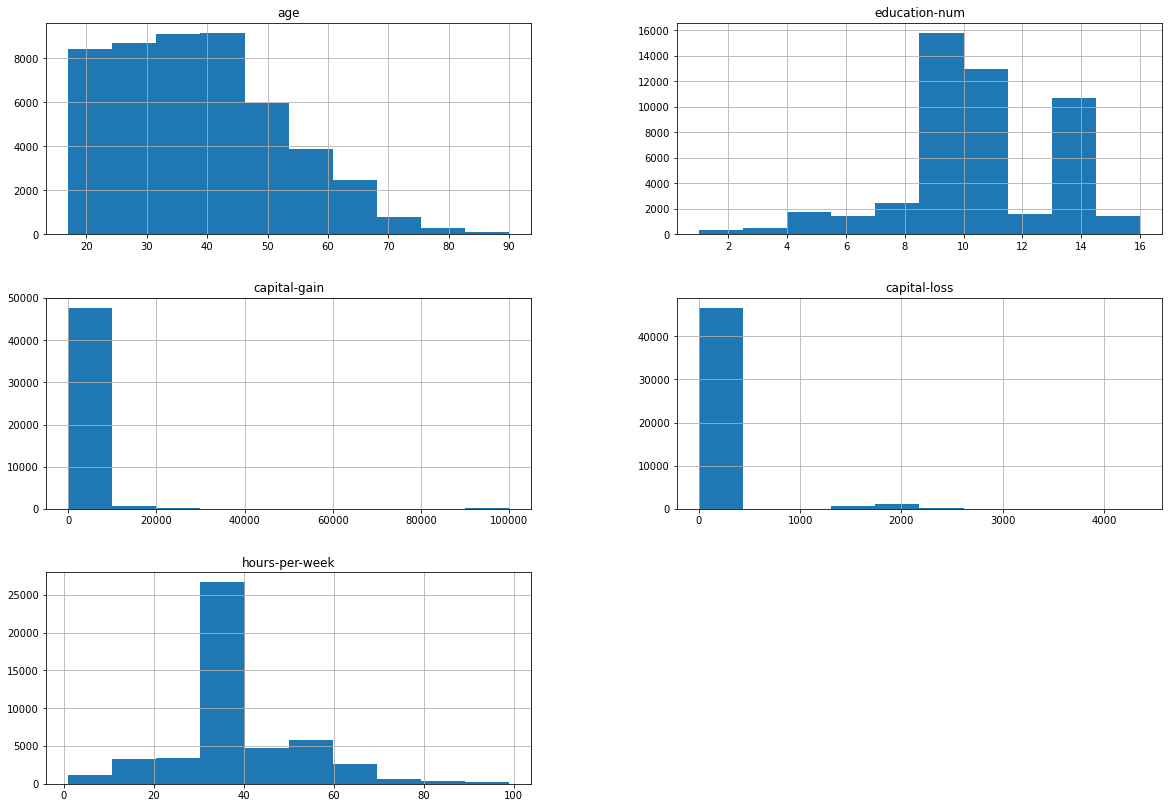

In [32]:
# Visualize the distribution of individual features, note that .hist() only works for features containing numerical values
dataset.hist(figsize=(20, 14))

Few comments on these variables :
- age : there are much less points for age > 70
- education-num : peaks at 10 and 13
- hours-per-week : peaks at 40
- capital-gain / capital-loss : most of values are close to 0

In [33]:
# seperate the data and the target
target_name = "class"
target = dataset[target_name]
target 

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
48837     <=50K
48838      >50K
48839     <=50K
48840     <=50K
48841      >50K
Name: class, Length: 48842, dtype: object

In [34]:
# keep the target variable out of data
data = dataset.drop(columns=[target_name,])
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


### 4. Data Preprocessing

In this step, we aim to treat data differently depending on their nature : numerical or categorical. In principe, we need to verify several stuffs.

- Detection of **redudant or highly correlated variables** and keep just one
- Deal with **missing values**
    - Replace them with a value (mean, median of the variable or nearest value)
    - Delete the concerned variable if it is not important for prediction : `df.dropna(axis = 0, inplace = True)` (axis = 1 to drop the column)
- Encoding of **categorical data**
    - Several strategies :
        - One Hot encoding (`OneHotEncoder`):  prevents the downstream models to make a false assumption about the ordering of categories. For a given feature, it will create as many new columns as there are possible categories. For a given sample, the value of the column corresponding to the category will be set to 1 while all the columns of the other categories will be set to 0.
        - Dummy encoding
        - Ordinal encoding / Label encoding (`OrdinalEncoder`): uses a lexicographical strategy to map string category labels to integers, but it accepts a categories constructor argument to pass categories in the expected ordering explicitly.
- Data normalization for **numerical data** (so-called **scaling features**) especially if the ML model is based on the distance
    - Linear models such as logistic regression generally benefit from scaling the features while other models such as decision trees do not need such preprocessing (but will not suffer from it). 
    - Working with non-scaled data will potentially force the algorithm to iterate more. Therefore, data scaling is beneficial in terms of computational performance
- **Adjust the class distribution** if a huge imbalance between different classes is observed.
    - Over sampling : SMOTE, random oversampling, etc.
    - Under sampling : Cluster, random undersamling, etc.

#### Drop the duplicated column

In [35]:
data = data.drop(columns="education-num")

#### Separate categorical and numerical variables using their data types 
We can get the data type of every vairable by using `dtypes`, we could obviously see that numerical variables have `int64` data type while categorical variables are `object` type. The `object` data type means that it contains string values (or date, time values etc).

In [36]:
data.dtypes

age                int64
workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

In [37]:
# Scikit-learn helper function `make_column_selector` selects features based on their data type
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [38]:
numerical_columns_selector = selector(dtype_exclude=object)
numerical_columns = numerical_columns_selector(data)
numerical_columns

['age', 'capital-gain', 'capital-loss', 'hours-per-week']

#### Scaling the numerical features

We use a scikit-learn transformer called `StandardScaler` shifts and scales each feature individually so that they all have a 0-mean and a unit standard deviation.

In [41]:
from sklearn.preprocessing import StandardScaler

# The method fit_transform is a shorthand method to call successively fit and then transform.

# The fit method is applied to scale each feature individually (i.e. each column in the data matrix). 
# For each feature, we subtract its mean and divide by its standard deviation (specific to the StandardScaler).

# The transform method uses a predefined function, called a transformation function, 
# it uses the model states and the input data to output a transformed version of the input data.

scaler = StandardScaler()
data_train_scaled = scaler.fit_transform(data[numerical_columns])
data_train_scaled.shape

(48842, 4)

#### Encoding of categorical variables

In general **OneHotEncoder** is the encoding strategy used when the downstream models are linear models while **OrdinalEncoder** is often a good strategy with tree-based models.

Using an OrdinalEncoder will output ordinal categories. This means that there is an order in the resulting categories (e.g. 0 < 1 < 2). The impact of violating this ordering assumption is really dependent on the downstream models. Linear models will be impacted by misordered categories while tree-based models will not. You can still use an OrdinalEncoder with linear models but you need to be sure that:
1. the original categories (before encoding) have an ordering
2. the encoded categories follow the same ordering than the original categories

One-hot encoding categorical variables with high cardinality can cause computational inefficiency in tree-based models. Because of this, it is not recommended to use OneHotEncoder in such cases even if the original categories do not have a given order.

In [43]:
from sklearn.preprocessing import OneHotEncoder

data_categorical = data[categorical_columns]
encoder = OneHotEncoder(sparse=False)
data_encoded = encoder.fit_transform(data_categorical)
data_encoded.shape

(48842, 102)

In [47]:
# feature_names = encoder.get_feature_names_out(data_categorical.columns)
# pd.DataFrame(data_encoded, columns=feature_names).head()

If there is only a few number samples in a class of a variable, it will be a problem during cross-validation: if the sample ends up in the test set during splitting then the classifier would not have seen the category during training and will not be able to encode it. We can use the parameter `handle_unknown`, i.e. if an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros.

Be aware the **OrdinalEncoder** exposes as well a parameter `handle_unknown`. It can be set to `use_encoded_value`. If that option is chosen, you can define a fixed value to which all unknowns will be set to during transform. For example, `OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=42)` will set all values encountered during `transform` to `42` which are not part of the data encountered during the `fit` call. 



### 5. Model Development

#### Split data into train and test sets

The dataset will be split it into a training and testing sets. The reason is when building a machine learning model, it is important to evaluate the trained model on data that was not used to fit it, as generalization is more than memorization (meaning we want a rule that generalizes to new data, without comparing to data we memorized).

In [48]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=42, test_size=0.25, shuffle=True)

#### Create ML Pipeline

We can easily combine sequential operations with a scikit-learn Pipeline, which chains together operations and is used as any other classifier or regressor. The helper function `make_pipeline` will create a Pipeline: it takes as arguments the successive transformations to perform, followed by the classifier or regressor model.

Scikit-learn provides a `ColumnTransformer` class which will send specific columns to a specific transformer, making it easy to fit a single predictive model on a dataset that combines both kinds of variables together (heterogeneously typed tabular data).

A ColumnTransformer does the following:

- It splits the columns of the original dataset based on the column names or indices provided. We will obtain as many subsets as the number of transformers passed into the ColumnTransformer.
- It transforms each subsets. A specific transformer is applied to each subset: it will internally call fit_transform or transform. The output of this step is a set of transformed datasets.
- It then concatenates the transformed datasets into a single dataset.

The important thing is that ColumnTransformer is like any other scikit-learn transformer. In particular it can be combined with a classifier in a Pipeline:

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', OneHotEncoder(handle_unknown="ignore"), categorical_columns),
    ('standard_scaler', StandardScaler(), numerical_columns)])

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

#### Traning ML Model
- .fit(X, y) : train a model 
- .predict(X) : make predictions
- .score(X, y) : evaluate a model 

In [50]:
model.fit(data_train, target_train)
predicted_target = model.predict(data_test)
predicted_target[:5]

array([' <=50K', ' <=50K', ' >50K', ' <=50K', ' >50K'], dtype=object)


#### Model evaluation using cross-validation
- A single split of train test set does not provide the variability of performance, while cross-validation consists of repeating the procedure such that the training and testing sets are different each time. Cross validation generalization performance metrics are collected for each repetition and then aggregated. 
- Several strategies : 
    - `KFold` :  the entire dataset is split into K partitions. The fit/score procedure is repeated K times where at each iteration K - 1 partitions are used to fit the model and 1 partition is used to score. 
    - `ShuffleSplit`

In [51]:
from sklearn.model_selection import cross_validate
cv_result = cross_validate(model, data, target, cv=5)
# The output of cross_validate is a Python dictionary, which by default contains three entries: fit_time, score_time, test_score
cv_result

{'fit_time': array([1.12129879, 1.0698359 , 0.94944   , 1.00444794, 1.04453206]),
 'score_time': array([0.02778029, 0.02697015, 0.03013301, 0.02812195, 0.027529  ]),
 'test_score': array([0.8512642 , 0.8498311 , 0.84756347, 0.85247748, 0.85524161])}

The final result will be presented by the mean accuracy and the variation of the accuracy across folds. Note that by computing the standard-deviation of the cross-validation scores, we can estimate the uncertainty of our model generalization performance. This is the main advantage of cross-validation and can be crucial in practice.

In [52]:
scores = cv_result["test_score"]
print(
    "The mean cross-validation accuracy is: "
    f"{scores.mean():.3f} ± {scores.std():.3f}"
)

The mean cross-validation accuracy is: 0.851 ± 0.003


### 6. Model Testing
